# <font color='#eb3483'>Linear Regression with scikit-learn</font>

We are going to learn how to build a linear regression model to using the [`scikit-learn`](https://scikit-learn.org) library. We are going to use more than one variable to predict a continuous variable. This is called multple linear regression. We begin by importing modules for data wrangling.

<!-- 
Even though its name is scikit-learn, it is imported as `sklearn`. It has many submodules.
For example, the `datasets` submodule has a group of simple datasets that can be used to evaulate models without having to use external files.

The Boston Housing dataset is available as a scikitlearn dataset.-->

In [11]:
from IPython.display import Image
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(rc={'figure.figsize':(6,5)}) 
import warnings
warnings.simplefilter("ignore")

## <font color='#eb3483'> Explore the data </font>

We'll be using is the [Boston Housing](https://www.kaggle.com/c/boston-housing) dataset. This dataset consists of information about houses in the Boston area. 

## **We aim to predict the price of a house.**

We import the data from sklearn as follows

In [12]:
from sklearn import datasets

In [13]:
boston = datasets.load_boston()

`scikit-learn` datasets behave like a dictionary, we can access some common keys like this one.

In [14]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

The key `DESCR` includes a dataset description

In [15]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Sidenote: What is the 'B' column? Let's talk about that...

The key `target` holds the target variable (in the boston dataset, the median housing value in thousands of dollars)

In [16]:
boston["target"]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

The names of the independent variables (the ones we use to predict) are stored on the key `feature_names`

In [17]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Finally, the data (the values of the independent variables are stored on the key `data`

In [18]:
boston["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [19]:
type(boston["data"])

numpy.ndarray

Let's display the boston data in a dataframe.

In [54]:
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [25]:
df["target"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## <font color='#eb3483'> Split train-test dataset </font>

Before we create the regression model we need to split the data into training and test subsets. This way, we train on a portion of the data, the training data, and we measure model performance on another portion the model hasn't trained on, the test data. Usually the training set is larger than the test set.

<!--One way to avoid method overfitting and making sure that the model doesn't memorize the dataset is to do a train test split.-->
![title](media/train_test_split.png) 


![title](media/train_test.png)

We can use `sklearn` `train_test_split` function to split a dataset into train and test datasets


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_test_split?

`train_test_split` works both with numpy arrays and pandas dataframes. If we use it with numpy arrays, it returns 4 different arrays, a pair X/y for training and another pair X/y for the test dataset. If we pass it a dataframe it will split it in two dataframes (train and test). 

We use the argument `test_size` to define the % size of the test dataset.

The train and test datasets are split at random. That means, if we run the `train_test_split` twice we will get different datasets. In order to make sure we get the same splits again and again we can fix the *seed*, that is, the number that defines numpy's random number generation (that is used to calculate the splits).We can use the argument `random_state` to set the seed for train_test_split.

In [55]:
X = df[boston["feature_names"]]  # numpy array
y = df["target"]                 # numpy array
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#should have more data for training than testing, such as 70:30, 80:20

KeyError: 'target'

In [56]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [29]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test',  X_test.shape)
print('y_test',  y_test.shape)

X_train (404, 13)
y_train (404,)
X_test (102, 13)
y_test (102,)


## <font color='#eb3483'> Fit the regression model </font>

The algorithms for linear regression are in the `linear_model` submodule

In [30]:
from sklearn.linear_model import LinearRegression

In [33]:
LinearRegression?

In order to use the model (also called estimator) of class `LinearRegression` we simply create (*instantiate*) an object (with parenthesis).

In [34]:
# this is the class
LinearRegression

sklearn.linear_model._base.LinearRegression

In [35]:
# this is the object of class LinearRegression
model = LinearRegression()
model

LinearRegression()

We've just created an ordinary least squares (OLS) regression model. 

We train the model on the training data with the `fit` method.

In [36]:
model.fit?

The method `fit` follows the same structure for pretty much every model in scikit-learn. We pass as arguments `X` (the training data) and `y` the target variable.

In [37]:
model.fit(X=X_train, y=y_train)

LinearRegression()

Now that the linear regression model is trained (fitted), it has two additional attributes. `coef_` is an array containing the coefficients $\beta_{n}$ for the model, and `intercept_` contains the independent term $\alpha$ for the lineal model.

In [38]:
model.intercept_

25.1111784205115

In [39]:
model.coef_

array([-8.97234271e-02,  4.34685678e-02,  1.74200465e-02,  3.15034475e+00,
       -1.41562582e+01,  5.16236930e+00, -2.82722453e-02, -1.50667407e+00,
        2.05512722e-01, -1.08386346e-02, -9.53678330e-01,  1.29840534e-02,
       -3.79532978e-01])

## <font color='#eb3483'> Test </font>

Once the model is trained, we can use the method `predict` to predict on the test set

In [40]:
model.predict?

In [41]:
predictions = model.predict(X_test)
predictions

array([35.75720486, 21.74824455, 14.43467473, 14.71813737, 33.56889823,
       20.62793076, 33.12501421, 21.8670041 , 10.76185455,  8.79849199,
       23.89141361, 20.11421744, 32.69890987, 15.05118615, 22.92489627,
       17.24919723, 35.44422781, 31.31623976, 15.75878961, 25.68354825,
       16.6580288 , 18.44537696, 19.28817031, 19.95489855, 13.57375682,
       13.31180241, 12.56655657, 36.6904561 , 22.01490232, -0.2108577 ,
       12.16225499, 29.21731046, 11.56912169, 16.34350542, 21.3279719 ,
       31.96687224, 12.04703712, 32.5653922 , 20.4739736 , 17.91121424,
       22.10065794, 19.58665084, 24.47046219, 23.59234003, 21.94387831,
       24.11490868, 13.5293471 ,  9.3618759 , 26.53027851, 28.92853934,
       17.10191747, 24.74502272,  9.6801332 , 17.65835671, 27.79869502,
       14.09724782, 20.98152555, 24.69104899, 24.77405413, 30.21280596,
       33.52003719, 19.52159012,  9.86909626, 21.22163789, 37.36167131,
       23.50602616, 25.67946239, 33.6751776 , 33.87147753, 33.35

In [44]:
for y, y_pred in list(zip(y_test, predictions))[:5]:
    print("Real value: {:.3f} Estimated value: {:.5f}".format(y, y_pred))

Real value: 34.600 Estimated value: 35.75720
Real value: 23.200 Estimated value: 21.74824
Real value: 14.800 Estimated value: 14.43467
Real value: 16.600 Estimated value: 14.71814
Real value: 33.100 Estimated value: 33.56890


Add predictions to test set.

In [43]:
X = X_test.reset_index().copy() # make a copy of indices and data
X["target"] = y_test.tolist()
X["prediction"] = predictions
X.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,prediction
0,198,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62,34.6,35.757205
1,472,3.56868,0.0,18.10,0.0,0.580,6.437,75.0,2.8965,24.0,666.0,20.2,393.37,14.36,23.2,21.748245
2,27,0.95577,0.0,8.14,0.0,0.538,6.047,88.8,4.4534,4.0,307.0,21.0,306.38,17.28,14.8,14.434675
3,26,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6,14.718137
4,303,0.10000,34.0,6.09,0.0,0.433,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86,33.1,33.568898


In [45]:
type(X)

pandas.core.frame.DataFrame

Let's visualize the actual price against the predicted price

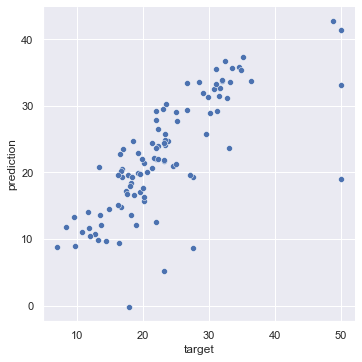

In [46]:
sns.relplot(x="target", y="prediction", data=X, kind="scatter")

Let's visualize crime against price

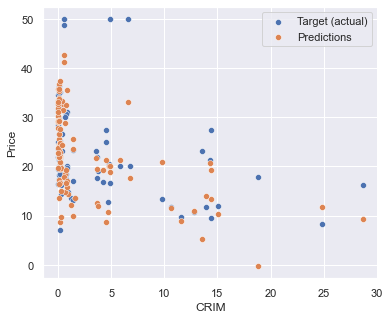

In [48]:
sns.scatterplot(x=X["CRIM"], y=X["target"], label = 'Target (actual)')
sns.scatterplot(x=X["CRIM"], y=X["prediction"], label = 'Predictions')
sns.mpl.pyplot.ylabel("Price");
#overfitting

## <font color='#eb3483'>A bit of tuning</font>

Every  `scikit-learn` model has parameters that we can modify to adjust the behavior of the model. These are called **`hyperparameters`** and we can read them with `get_params`

In [49]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [50]:
LinearRegression?

For example, we can set the hyperparameter `fit_intercept` to False to make the model use no intercept 
<!--(meaning it won't have an $\alpha$ parameter)-->

In [52]:
model2 = LinearRegression(fit_intercept = False)